<a href="https://colab.research.google.com/github/prem55gayakwad/BT_eth_sender/blob/main/Roll_Over_Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data from file 'filename.csv' 
data = pd.read_csv("M.csv")

In [3]:
import csv
time=[]
amp=[]
with open('M.csv', 'r') as rf:
    reader = csv.reader(rf, delimiter=',')
    for row in reader:
      time.append(row[0]) 
      amp.append(row[1])

In [4]:
print("Enter Warning and Damage limit (Amplitude)\n")
warn=float(input('Warning Limit (mg):'))
danger=float(input('Danger Limit (mg):'))
print('\n')
print("Input Rollout frequencies\n")
roll_ele=float(input('Rolling Element (HZ):'))
inner_race=float(input('Inner Race (Hz):'))
outer_race=float(input('Outer Race (Hz):'))
Tolerance= float(input('Tolerance (Hz):'))
print('\n')
#print("Enter Quotient\n")
#quotient=float(input('Quotien:'))
quotient=0.762939

Enter Warning and Damage limit (Amplitude)

Warning Limit (mg):35
Danger Limit (mg):40


Input Rollout frequencies

Rolling Element (HZ):1234
Inner Race (Hz):3245
Outer Race (Hz):2345
Tolerance (Hz):50




In [5]:
amp_time=[float(i) for i in amp]
time_time=[float(i) for i in time]
time_feq = [element * quotient for element in time_time] #Multiplied time domain by HFFT Quotient : 0.762939

Select from below option 

1: Rollover Frequency of Rolling element
2: Rollover Frequency of Inner race
3: Rollover Frequency of Outer race
1


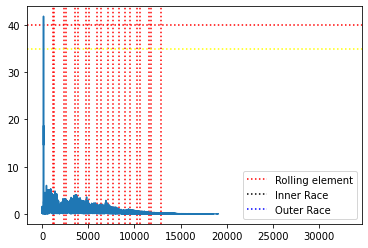

In [21]:
#Plot graph
print('Select from below option \n')
print('1: Rollover Frequency of Rolling element')
print('2: Rollover Frequency of Inner race')
print('3: Rollover Frequency of Outer race')


selc=int(input())
for i in range (1,11):
    if (selc==1):
      plt.axvline(((roll_ele-Tolerance)*i), 0, 200, label='',color="red", linestyle=":")
      plt.axvline(((roll_ele+Tolerance)*i), 0, 200, label='',color="red", linestyle=":")
      plt.axvline(((inner_race-Tolerance)*i), 0, 200, label='',color="white", linestyle=":")
      plt.axvline(((inner_race+Tolerance)*i), 0, 200, label='',color="white", linestyle=":")
      plt.axvline(((outer_race-Tolerance)*i), 0, 200, label='',color="white", linestyle=":")
      plt.axvline(((outer_race+Tolerance)*i), 0, 200, label='',color="white", linestyle=":")

    if (selc==2):
      plt.axvline(((inner_race-Tolerance)*i), 0, 200, label='',color="black", linestyle=":")
      plt.axvline(((inner_race+Tolerance)*i), 0, 200, label='',color="black", linestyle=":")
      plt.axvline(((roll_ele-Tolerance)*i), 0, 200, label='',color="white", linestyle=":")
      plt.axvline(((roll_ele+Tolerance)*i), 0, 200, label='',color="white", linestyle=":")
      plt.axvline(((outer_race-Tolerance)*i), 0, 200, label='',color="white", linestyle=":")
      plt.axvline(((outer_race+Tolerance)*i), 0, 200, label='',color="white", linestyle=":")

    if (selc==3):
      plt.axvline(((outer_race-Tolerance)*i), 0, 200, label='',color="blue", linestyle=":")
      plt.axvline(((outer_race+Tolerance)*i), 0, 200, label='',color="blue", linestyle=":")
      plt.axvline(((inner_race-Tolerance)*i), 0, 200, label='',color="white", linestyle=":")
      plt.axvline(((inner_race+Tolerance)*i), 0, 200, label='',color="white", linestyle=":")
      plt.axvline(((roll_ele-Tolerance)*i), 0, 200, label='',color="white", linestyle=":")
      plt.axvline(((roll_ele+Tolerance)*i), 0, 200, label='',color="white", linestyle=":")


plt.axvline(0, 0, 0, label='Rolling element',color="red", linestyle=":")
plt.axvline(0, 0, 0, label='Inner Race',color="black", linestyle=":")
plt.axvline(0, 0, 0, label='Outer Race',color="blue", linestyle=":")
plt.axhline(y=warn, color="yellow", linestyle=":")
plt.axhline(y=danger, color="red", linestyle=":")
plt.plot(time_feq, amp_time)
plt.legend()
plt.show()

In [14]:
for i in range (1,11):
 roll_min=float((roll_ele-Tolerance)*i)
 roll_max=float((roll_ele+Tolerance)*i)
 inner_min=float((inner_race-Tolerance)*i)
 inner_max=float((inner_race+Tolerance)*i)
 outer_min=float((outer_race-Tolerance)*i)
 outer_max=float((outer_race+Tolerance)*i)

In [17]:
for i in range (1,11):
  roll_f_tmin=int((((roll_min/i)+(Tolerance))/(quotient)))
  roll_f_tmax=int((((roll_max/i)-(Tolerance))/(quotient)))

  inner_f_tmin=int((((inner_min/i)+(Tolerance))/(quotient)))
  inner_f_tmax=int((((inner_max/i)-(Tolerance))/(quotient)))

  outer_f_tmin=int((((outer_min/i)+(Tolerance))/(quotient)))
  outer_f_tmax=int((((outer_max/i)-(Tolerance))/(quotient)))
  
  for x in amp_time[roll_f_tmin:roll_f_tmax+1] or amp_time[inner_f_tmin:inner_f_tmax+1] or amp_time[outer_f_tmin:outer_f_tmax+1]:
        if x > warn:
            print('Warning')
      
  for x in amp_time[roll_f_tmin:roll_f_tmax+1] or amp_time[inner_f_tmin:inner_f_tmax+1] or amp_time[outer_f_tmin:outer_f_tmax+1]:
        if x > danger:
            print('Danger')
        
  for x in amp_time[roll_f_tmin:roll_f_tmax+1] or amp_time[inner_f_tmin:inner_f_tmax+1] or amp_time[outer_f_tmin:outer_f_tmax+1]:
        if x == 0:
            print('Warning')
     
